In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Zadanie 5

In [5]:
def census_transform(image, window_size=5):
    height, width = image.shape
    census = np.zeros((height, width), dtype=np.uint64)
    
    offset = window_size // 2
    
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            center = image[y, x]
            bit = 0
            census_code = 0
            
            for wy in range(-offset, offset + 1):
                for wx in range(-offset, offset + 1):
                    if wy == 0 and wx == 0:
                        continue
                    
                    neighbor = image[y + wy, x + wx]
                    if neighbor > center:
                        census_code |= (1 << bit)
                    bit += 1
            
            census[y, x] = census_code
    
    return census

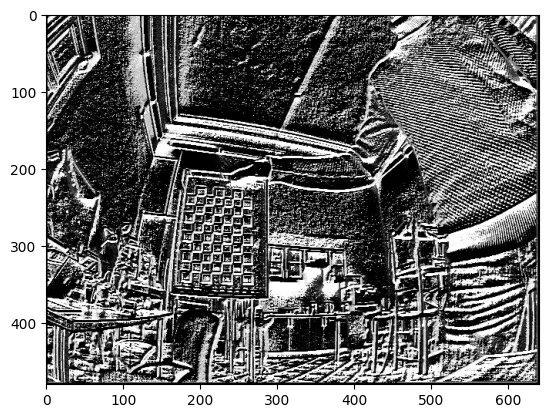

In [6]:
path = ""
image_dir = path + "pairs/"
img = cv2.imread(image_dir +"/right_%02d.png"%29, 0)
census = census_transform(img, 5)

plt.imshow(census, cmap='gray')
plt.show()

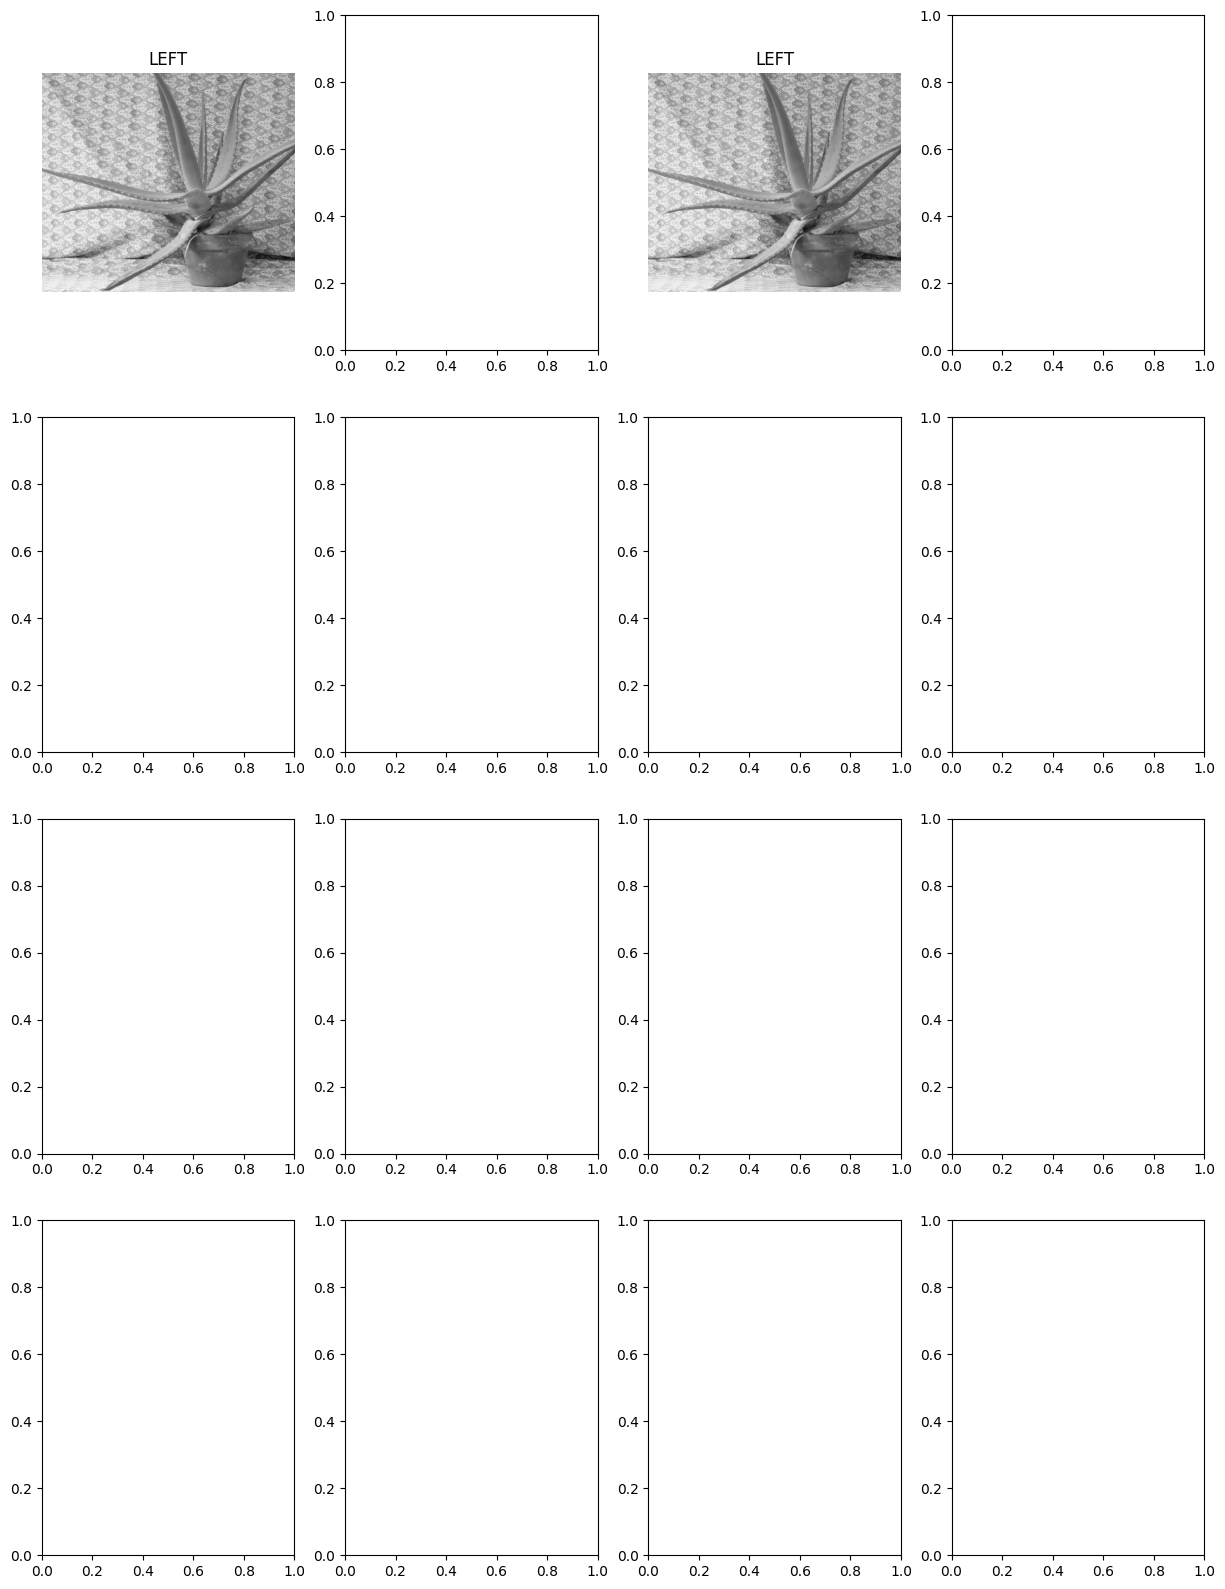

In [9]:
fig, axs = plt.subplots(4, 4, figsize=(15, 20))

img_left = cv2.imread("aloes/aloeL.jpg")
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)

img_right = cv2.imread("aloes/aloeR.jpg")
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

axs[0,0].imshow(img_left, cmap='gray')
axs[0,0].set_title("LEFT")
axs[0,0].axis('off')

axs[0,2].imshow(img_left, cmap='gray')
axs[0,2].set_title("LEFT")
axs[0,2].axis('off')
plt.show()